**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of uncorrelated variables called principal components (PCs). These components are ordered by the amount of variance they capture from the original data.

A **scree plot** visually displays how much variance each principal component captures from the data. It helps determine how many components to retain.

Key Features of a Scree Plot:
X-axis: Lists the principal components (PC1, PC2, PC3, etc.)

Y-axis: Shows the corresponding eigenvalues or explained variance.

Curve shape: Starts high (PC1 captures maximum variance) and decreases gradually.

A typical scree plot looks like a steep drop that gradually levels off — this leveling is called the elbow.

#### Interpreting the Scree Plot

**Step 1: Look for the Elbow Point**  

- The elbow is where the plot transitions from a steep slope to a flatter curve.
- Components before the elbow represent meaningful variance (retain these).
- Components after the elbow are often just noise or minor variation.

**Step 2: Retain Meaningful Components**   

- The rule of thumb: Keep the components up to the elbow point.
- This choice ensures most information is preserved while simplifying your dataset.

**Step 3: Ignore Lesser Components**    

- Components beyond the elbow add little value, as they explain diminishing amounts of variance.

**Practical Example: PCA and Scree Plot on the Iris Dataset**

In [15]:
# Step 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# Step 2. Load and prepare data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [17]:
# Step 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Step 4. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

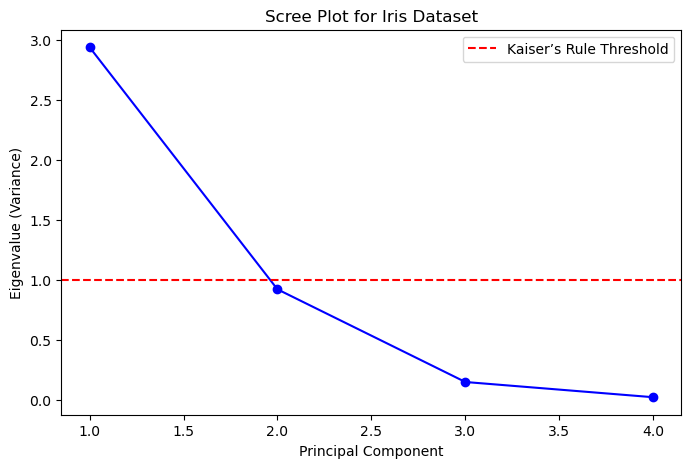

In [19]:
# Step 5. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, 'o-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')
plt.title('Scree Plot for Iris Dataset')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser’s Rule Threshold')
plt.legend()
plt.show()

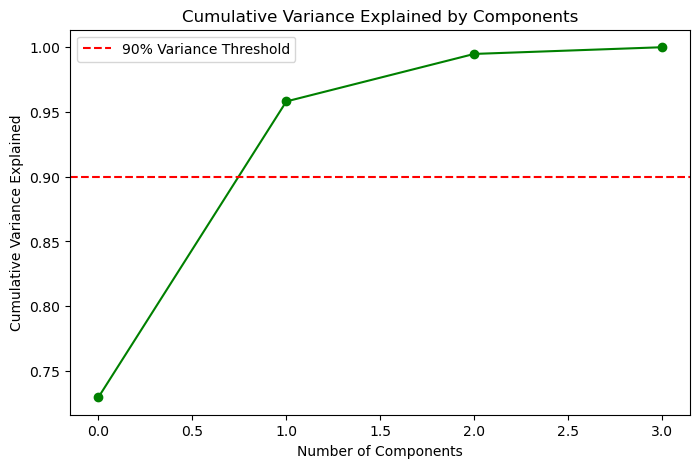

In [20]:
# Step 6. Cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='g')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.show()


**Interpretation**

In Iris, PCA captures nearly all important variance using just 2 principal components, as seen from the elbow point at PC2 in the scree plot.
- The first few principal components (often 2–3) capture most of the dataset’s variability.
- When the plot levels off, additional PCs add little new information.
- PCA users often aim for ≥90% variance explained.

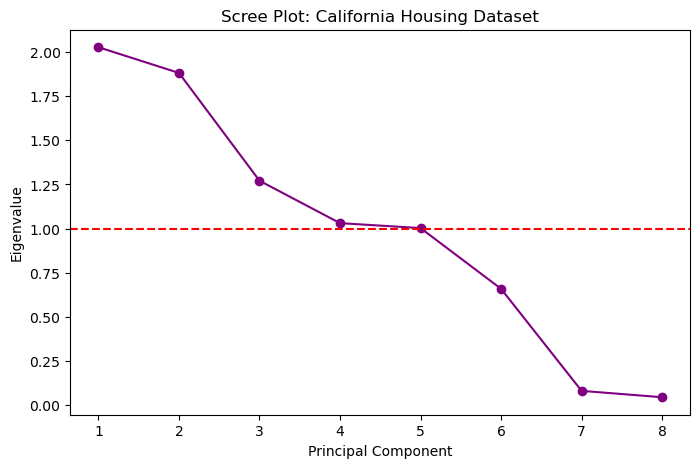

   Component  Explained Variance Ratio  Cumulative Variance
0          1                     0.253                0.253
1          2                     0.235                0.489
2          3                     0.159                0.647
3          4                     0.129                0.776
4          5                     0.125                0.902
5          6                     0.082                0.984
6          7                     0.010                0.994
7          8                     0.006                1.000


In [21]:
# Alternative Dataset Example: California Housing
from sklearn.datasets import fetch_california_housing

# Load the dataset
california = fetch_california_housing()
Xc = pd.DataFrame(california.data, columns=california.feature_names)

# Standardize
Xc_scaled = StandardScaler().fit_transform(Xc)

# PCA
pca_c = PCA()
Xc_pca = pca_c.fit_transform(Xc_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_c.explained_variance_)+1), pca_c.explained_variance_, 'o-', color='purple')
plt.title('Scree Plot: California Housing Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Variance explained table
evar = pd.DataFrame({
    'Component': range(1, len(pca_c.explained_variance_ratio_)+1),
    'Explained Variance Ratio': np.round(pca_c.explained_variance_ratio_, 3),
    'Cumulative Variance': np.round(np.cumsum(pca_c.explained_variance_ratio_), 3)
})
print(evar)


**Interpretation for California Housing PCA**

In California Housing, the first few components (around 3–4) typically explain >90% of the variance, demonstrating PCA’s utility for data simplification before modeling.
- Eigenvalues (variances) show how influential each component is.
- Explained variance ratio reveals the percentage of total dataset variance each PC contributes.
- The cumulative variance curve helps decide how many PCs explain 90% or more of total variance.

**To estimate how many components are sufficient:**

- Use the scree plot elbow method.
- Look at cumulative variance (setting a threshold like 0.90).
- Optionally use Kaiser’s Criterion: retain components with eigenvalues ≥ 1.

**Scree Plot Key Takeaways**

- Scree plots appear as a line plot of eigenvalues vs. component number.
- The “elbow” heuristic identifies where variance sharply declines ().​​
- Typically, only the PCs before the curve flattens are kept—these retain most variance ().​​
- The first components usually explain a big majority of variability (e.g., the first 2 may capture >80% in small datasets like iris).

**Summary of the SVD–PCA–Scree Plot Relationship**

Concept     |  Function                                                     |  Role in Dimensionality Reduction                   
------------|---------------------------------------------------------------|-----------------------------------------------------
SVD         |  Matrix factorization (X=UΣV^T)                 |  Provides mathematically stable basis for PCA       
PCA         |  Finds directions of maximum variance (principal components)  |  Transforms data into reduced uncorrelated variables
Scree Plot  |  Visual tool showing eigenvalues per component                |  Helps determine optimal number of components       

Sources:

[1](https://www.spsanderson.com/steveondata/posts/2023-10-24/index.html)
[2](https://www.youtube.com/watch?v=vFUvNICWVz4)
[3](https://bradleyboehmke.github.io/HOML/pca.html)
[4](https://www.youtube.com/watch?v=JXtISpdDPNY)
[5](https://www.datacamp.com/tutorial/pca-analysis-r)
[6](https://biostatsquid.com/pca-simply-explained/)
[7](https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/)
[8](https://www.statalist.org/forums/forum/general-stata-discussion/general/1348223-principal-component-analysis-plot-explained-variance)